## Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

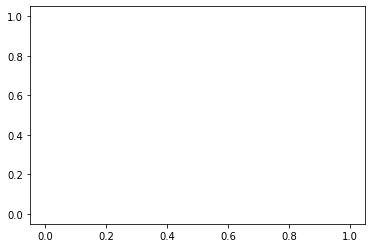

In [2]:
plt.plot()

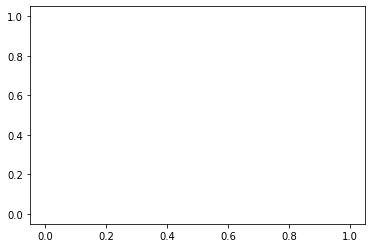

In [3]:
plt.plot(); #add ; to remove []

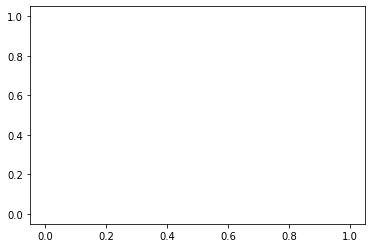

In [4]:
plt.plot()
plt.show()

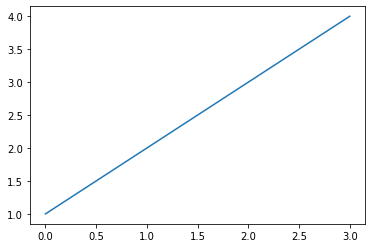

In [5]:
plt.plot([1, 2, 3, 4]) # assume x = [0, 1, 2, 3]

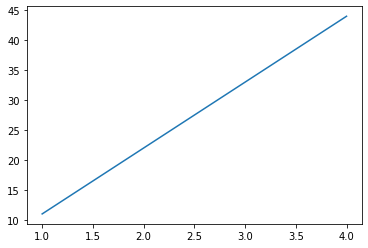

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)

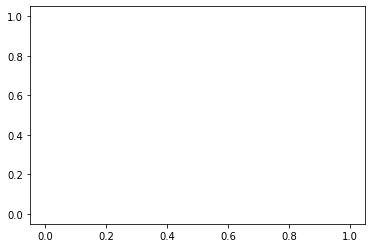

In [7]:
plt.plot();

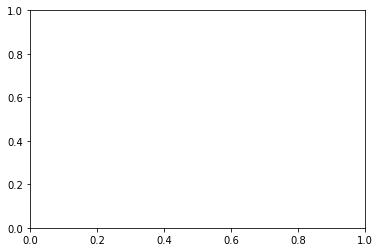

In [8]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

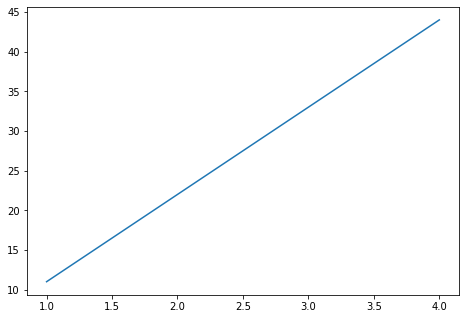

In [9]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

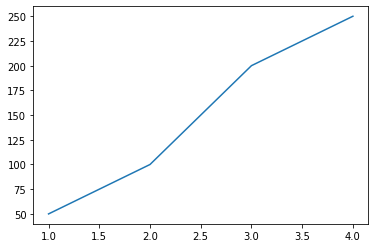

In [10]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

# Matplotlib example workflow

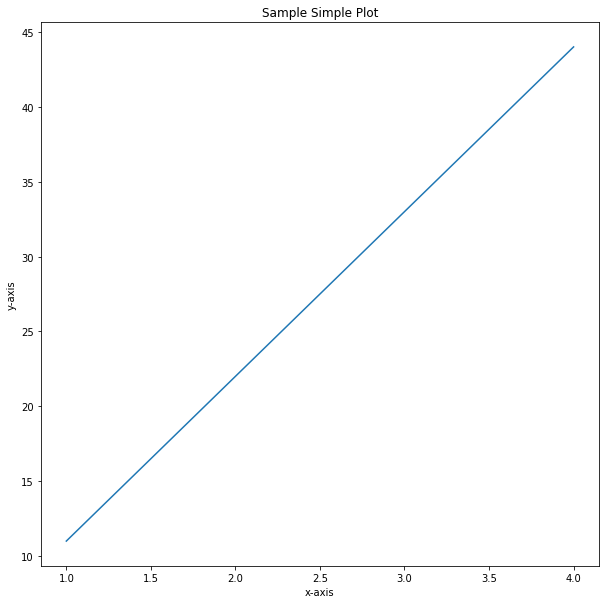

In [11]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("images/simple-plot.png")

<img src="images/anatomy-of-a-matplotlib-plot-1.png" />

<img src="images/anatomy-of-a-matplotlib-plot-2.png" />

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [12]:
import numpy as np

In [13]:
# Create an array
x = np.linspace(0, 10, 100)
x[0:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

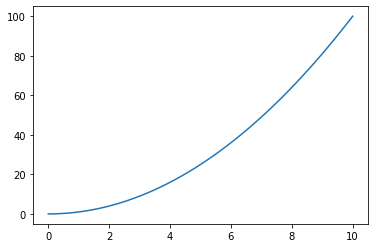

In [14]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

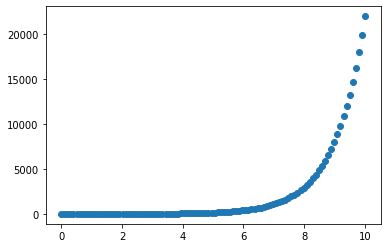

In [15]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

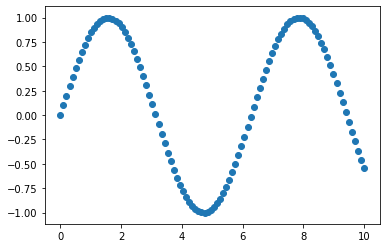

In [16]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

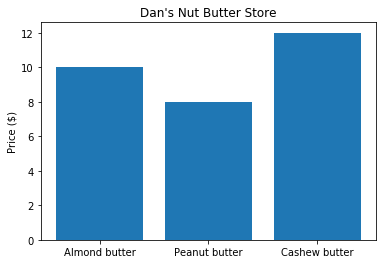

In [17]:
# Make a Bar plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

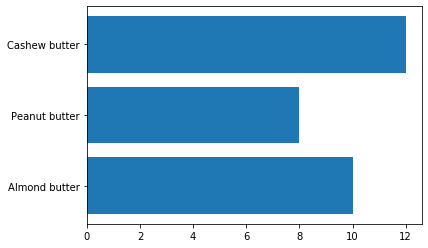

In [18]:
# Make a horizontal bar plot
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

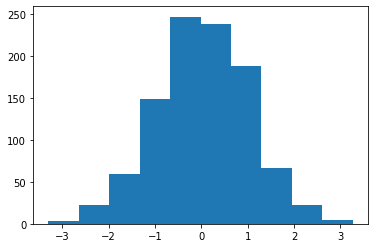

In [19]:
# Make a Histogram plot
x = np.random.randn(1000) # Make some data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

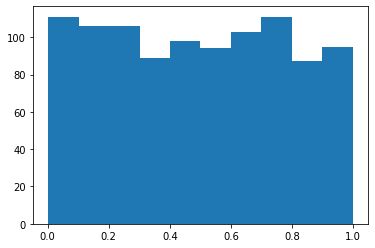

In [20]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

## Two options for subplots

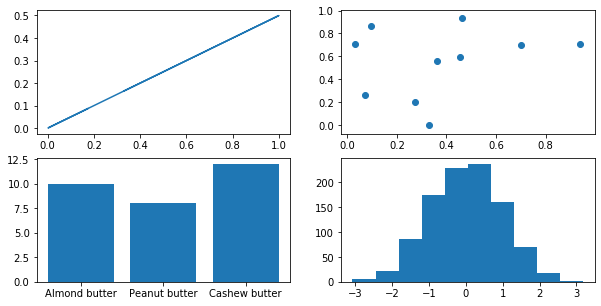

In [21]:
# Subplots Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

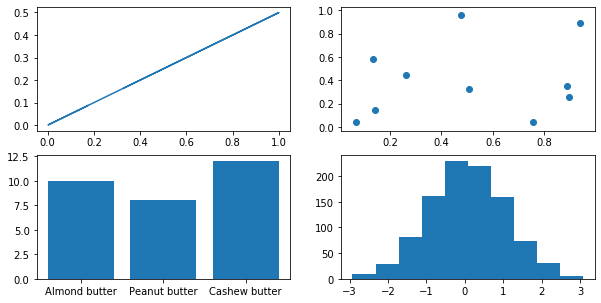

In [22]:
# Subplots Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting From Pandas DataFrames

In [23]:
import pandas as pd

In [24]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -1.251095
2020-01-02   -0.824986
2020-01-03    0.850040
2020-01-04    0.980751
2020-01-05   -1.264269
                ...   
2022-09-22    0.824472
2022-09-23   -0.487576
2022-09-24   -0.042450
2022-09-25    1.390054
2022-09-26   -1.328511
Freq: D, Length: 1000, dtype: float64

In [25]:
# What does cumsum() do?
ts.cumsum()

2020-01-01   -1.251095
2020-01-02   -2.076081
2020-01-03   -1.226041
2020-01-04   -0.245291
2020-01-05   -1.509560
                ...   
2022-09-22   -1.139077
2022-09-23   -1.626653
2022-09-24   -1.669102
2022-09-25   -0.279048
2022-09-26   -1.607560
Freq: D, Length: 1000, dtype: float64

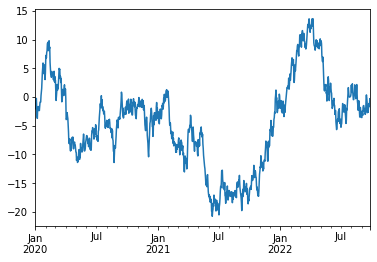

In [26]:
ts.cumsum().plot();

In [27]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [28]:
# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [29]:
type(car_sales["Price"][0])

str

In [30]:
# Remove last two zeros from price
#  4    0   0   0   0   0
# [-6][-5][-4][-3][-2][-1]
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [31]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [32]:
type(car_sales["Price"][0])

str

In [33]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


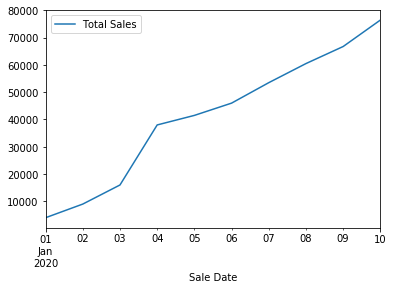

In [34]:
car_sales.plot(x="Sale Date", y="Total Sales");

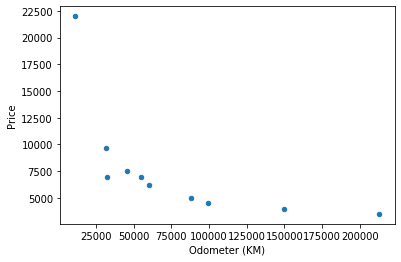

In [35]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric 
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [36]:
# How aboute a bar graph?
x = np.random.rand(10, 4)
x

array([[0.08212402, 0.95909583, 0.60301323, 0.81619668],
       [0.89198329, 0.13847976, 0.51580971, 0.84236304],
       [0.91466119, 0.5433653 , 0.60801047, 0.28323789],
       [0.77459785, 0.7434077 , 0.22532595, 0.94253373],
       [0.53353787, 0.79646986, 0.97500417, 0.09487082],
       [0.74512584, 0.34145403, 0.0718877 , 0.91822123],
       [0.19863035, 0.63823155, 0.16375653, 0.38501386],
       [0.36028123, 0.11484146, 0.94070125, 0.26713054],
       [0.79954982, 0.38032048, 0.53131988, 0.65423248],
       [0.66969234, 0.0799859 , 0.32225398, 0.28309746]])

In [37]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.082124,0.959096,0.603013,0.816197
1,0.891983,0.138480,0.515810,0.842363
2,0.914661,0.543365,0.608010,0.283238
3,0.774598,0.743408,0.225326,0.942534
4,0.533538,0.796470,0.975004,0.094871
5,0.745126,0.341454,0.071888,0.918221
6,0.198630,0.638232,0.163757,0.385014
7,0.360281,0.114841,0.940701,0.267131
8,0.799550,0.380320,0.531320,0.654232
9,0.669692,0.079986,0.322254,0.283097


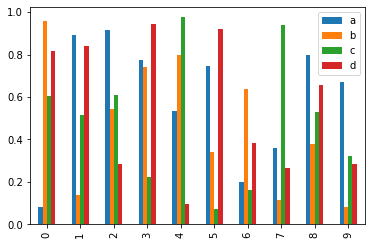

In [38]:
df.plot.bar();

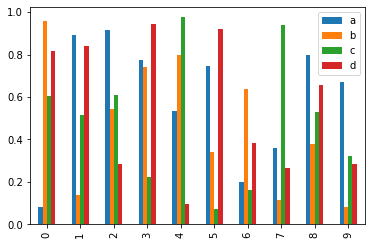

In [39]:
# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

In [40]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


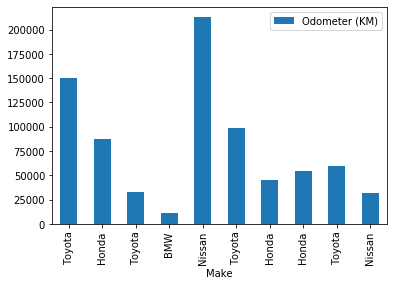

In [41]:
car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

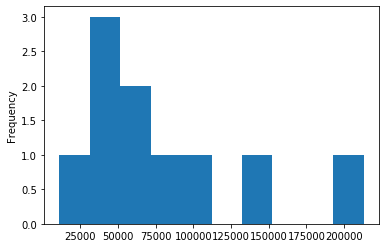

In [42]:
# How about Histograms?
car_sales["Odometer (KM)"].plot.hist();

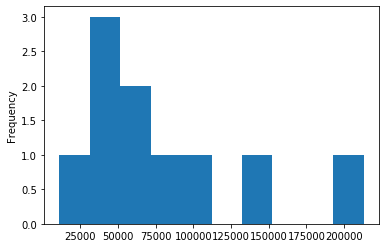

In [43]:
# bins=10 default , bin width = 25,car_sales["Price"].plot.hist(bins=10);000
car_sales["Odometer (KM)"].plot(kind="hist");

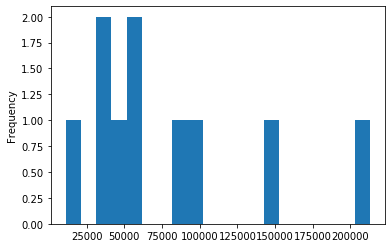

In [44]:
# Default number of bins is 10, bin width = 12,500
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [45]:
# Let's try with another dataset
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


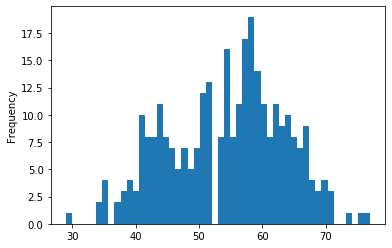

In [46]:
# Create a histogram of age
# outliner: 3 std away
heart_disease["age"].plot.hist(bins=50);

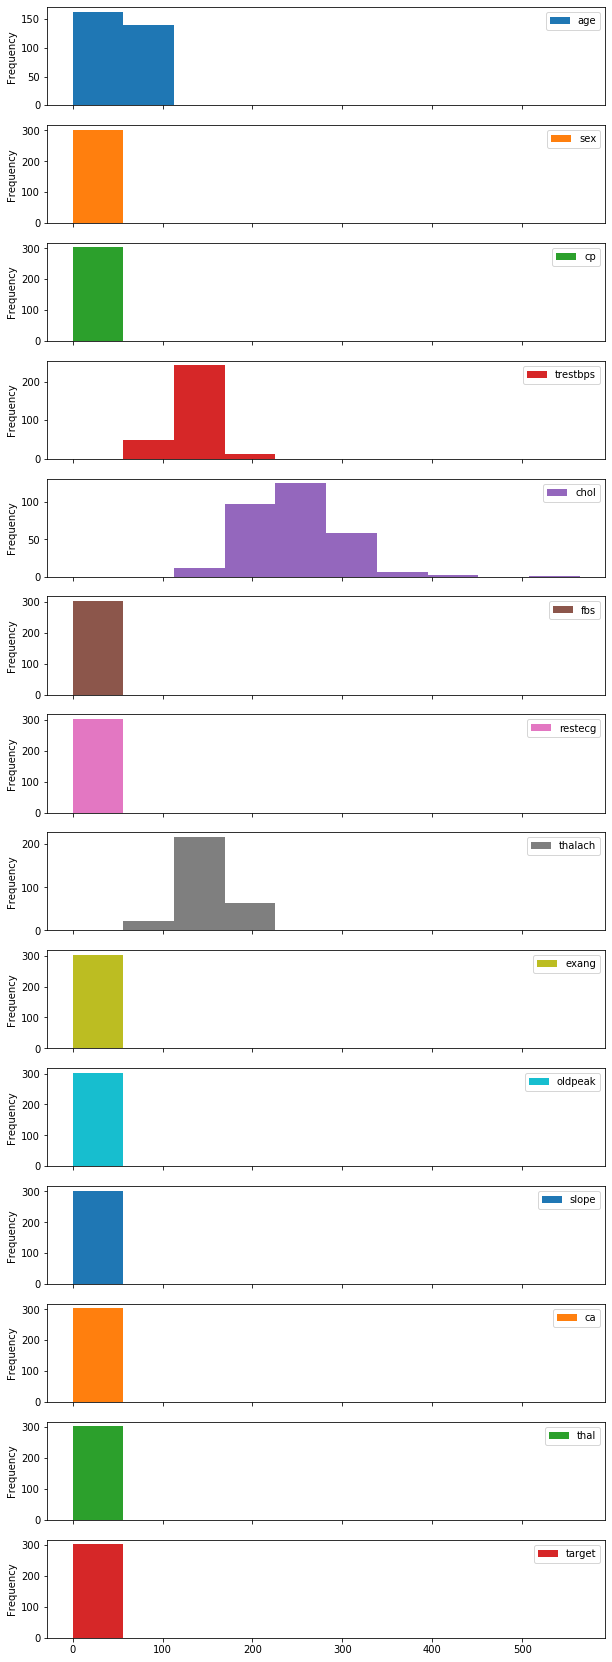

In [47]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplpt vs matplotlib OO method?)
* When plotting something quickly, okay to use pyplot method
* When plotting something more advanced, use the OO method

In [48]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


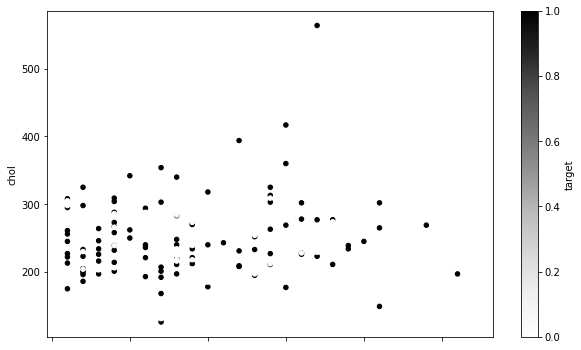

In [49]:
# Pyplot method
# c: change colur of plot base on target value [0,1]
over_50.plot(kind='scatter', 
             x='age', 
             y='chol', 
             c='target', 
             figsize=(10, 6));

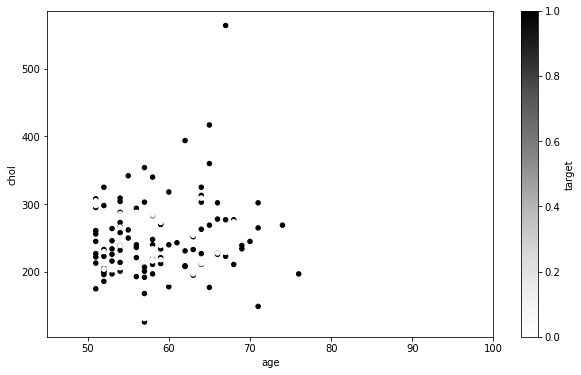

In [50]:
# OO method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', 
             x="age", 
             y="chol", 
             c='target', 
             ax=ax);
ax.set_xlim([45, 100]);

In [51]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
over_50.target.unique()

array([1, 0])

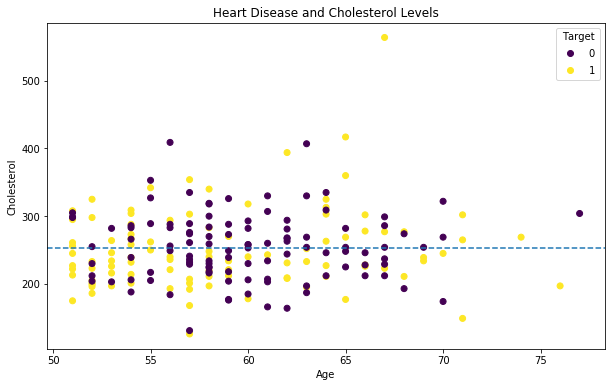

In [53]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(), linestyle="--");

In [54]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


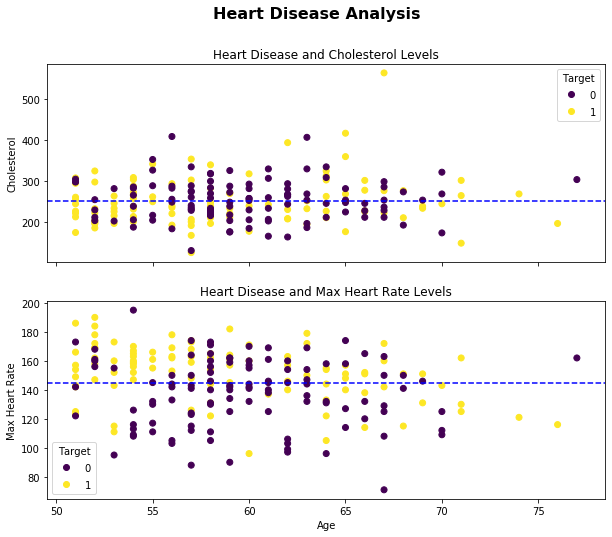

In [55]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(x=over_50["age"], 
                      y=over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
#         xlabel="Age",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

<img src="images/anatomy-of-a-matplotlib-plot-1.png" />

<img src="images/anatomy-of-a-matplotlib-plot-2.png" />